In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
daily_shifts_fpath = "../../WdwByDay_Output/All_pats_dayily_centroid_shifts.csv"
daily_shifts_df_ = pd.read_csv(daily_shifts_fpath)
total_shifts_df = daily_shifts_df_.groupby('PatID').sum().reset_index()

In [11]:
daily_shifts_df_

,PatID,DayNr,N3,N2,N1,REM,Wake
0,pat_FR_253,0->1,15.394804,8.062258,2.000000,1.414214,15.033296
1,pat_FR_253,1->2,4.898979,9.110434,5.830952,10.246951,8.062258
2,pat_FR_253,2->3,1.000000,5.916080,5.385165,8.124038,8.062258
3,pat_FR_253,3->4,5.196152,8.306624,5.385165,14.282857,11.445523
4,pat_FR_253,4->5,7.681146,9.539392,20.124612,12.529964,10.049876
5,pat_FR_253,5->6,20.396078,3.000000,10.198039,25.159491,6.164414
6,pat_FR_970,0->1,3.316625,2.828427,3.741657,3.605551,19.646883
7,pat_FR_970,1->2,3.316625,3.316625,32.634338,18.384776,12.247449
8,pat_FR_970,2->3,3.741657,4.000000,3.162278,2.236068,12.409674
9,pat_FR_1084,0->1,1.000000,4.123106,1.732051,6.557439,5.099020


In [12]:
total_shifts_df

,PatID,DayNr,N3,N2,N1,REM,Wake
0,pat_FR_1084,0->11->22->33->44->55->6,26.984801,19.700138,63.027817,35.133960,58.938032
1,pat_FR_1096,0->11->22->33->44->5,62.519554,37.969861,17.652220,31.295207,38.231726
2,pat_FR_253,0->11->22->33->44->55->6,54.567160,43.934787,48.923932,71.757515,58.817625
3,pat_FR_970,0->11->22->3,10.374907,10.145052,39.538273,24.226396,44.304005


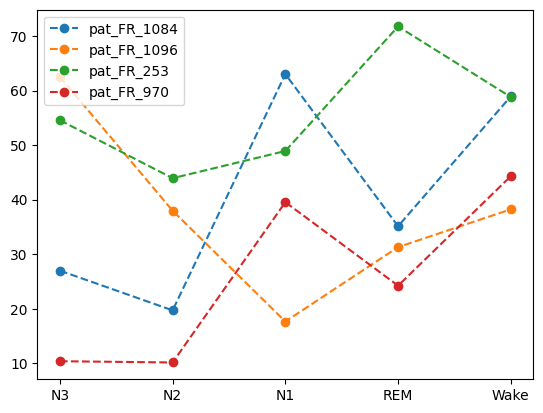

In [13]:
sleep_stages = ['N3','N2','N1','REM','Wake']
for pat_id in total_shifts_df.PatID.unique():
    pat_sel = total_shifts_df.PatID == pat_id
    pat_data = total_shifts_df.loc[pat_sel, sleep_stages].to_numpy().flatten()
    plt.plot(sleep_stages,pat_data, 'o--', label=pat_id)
plt.legend()

In [17]:
an_sleep_stages = ['N1', 'N2', 'N3']
ps_ls = []
for stage in an_sleep_stages:
    a = total_shifts_df[stage].to_numpy()
    b = total_shifts_df.Wake.to_numpy()
    res = stats.ttest_rel(a, b, axis=0)
    ps_ls.append(res.pvalue)
    #print(f"{stage} vs Wake, pvalue: {res.pvalue:.6f}")
fdr_corr_p_ls = stats.false_discovery_control(ps_ls)
for sti, stage in enumerate(an_sleep_stages):
    print(f"{stage} vs Wake, pvalue: {fdr_corr_p_ls[sti]:.6f}")

N1 vs Wake, pvalue: 0.341553
N2 vs Wake, pvalue: 0.271534
N3 vs Wake, pvalue: 0.464442


In [20]:
an_sleep_stages = ['N1', 'N2', 'N3']
ps_ls = []
for stage in an_sleep_stages:
    a = total_shifts_df[stage].to_numpy()
    b = total_shifts_df.Wake.to_numpy()
    res = stats.wilcoxon(a, b, axis=0)
    ps_ls.append(res.pvalue)
    print(f"pvalue: {res.pvalue:.6f}")

fdr_corr_p_ls = stats.false_discovery_control(ps_ls)
for sti, stage in enumerate(an_sleep_stages):
    print(f"{stage} vs Wake, pvalue: {fdr_corr_p_ls[sti]:.6f}")

N1 vs Wake, pvalue: 0.375000
N2 vs Wake, pvalue: 0.375000
N3 vs Wake, pvalue: 0.375000


In [16]:
an_sleep_stages = ['N1', 'N2', 'N3', 'REM', 'Wake']
ps_ls = []
for i_a in range(len(an_sleep_stages)):
    stage_a = an_sleep_stages[i_a]
    for i_b in range(i_a+1, len(an_sleep_stages)):
        stage_b = sleep_stages[i_b]
        print(f"{stage_a} vs. {stage_b}")
        a = total_shifts_df[stage_a].to_numpy()
        b = total_shifts_df[stage_b].to_numpy()
        res = stats.ttest_rel(a, b, axis=0)
        ps_ls.append(res.pvalue)
        print(f"pvalue: {res.pvalue:.6f}")

fdr_corr_p_ls = stats.false_discovery_control(ps_ls)
for sti, stage in enumerate(an_sleep_stages):
    print(f"{stage} vs Wake, pvalue: {fdr_corr_p_ls[sti]:.6f}")

N1 vs. N2
pvalue: 0.381153
N1 vs. N3
pvalue: 0.855856
N1 vs. REM
pvalue: 0.896820
N1 vs. Wake
pvalue: 0.227702
N2 vs. N3
pvalue: 0.127816
N2 vs. REM
pvalue: 0.174608
N2 vs. Wake
pvalue: 0.090511
N3 vs. REM
pvalue: 0.870510
N3 vs. Wake
pvalue: 0.464442
REM vs. Wake
pvalue: 0.336717
